# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')

south_df = pd.read_csv('SouthCallCenter.csv')


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
-North Branch 245
-South Branch 314
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
-North Branch - 9.98 busy, 1.9 not ready, 3.04 incoming wait, 2.96 call wait
-South Branch - 10.05 busy, 1.91 not ready, 3 incoming wait, 3.07 during call
3. What is the number of calls taken for each time block?
-North Branch Time Block
10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5
-South Branch
Time Block
10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5

In [2]:
# Put your EDA code here
print(north_df['Rep ID'].unique())
print(south_df['Rep ID'].unique())
north_df.describe()
south_df.describe()
north_df.info()
south_df.info()
north_df.groupby('Time Block')['Time Block'].count()
south_df.groupby('Time Block')['Time Block'].count()

['Brent' 'Cam' 'Todd' 'Duke' 'Joe' 'Lilly' 'Amanda' 'Andy' 'Xander']
['Kate' 'Eric' 'Susan' 'Alice' 'Sandy' 'Karl' 'Randy' 'George' 'Helga'
 'Josh' 'Sharon']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Inco

Time Block
10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5
Name: Time Block, dtype: int64

### EDA Results

Make note of your results here!

1. How many reps are in each branch?
-North Branch 9
-South Branch 11
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
-North Branch - 9.98 busy, 1.9 not ready, 3.04 incoming wait, 2.96 call wait
-South Branch - 10.05 busy, 1.91 not ready, 3 incoming wait, 3.07 during call
3. What is the number of calls taken for each time block?
-North Branch Time Block
10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5
-South Branch
Time Block
10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%
Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
5,5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,4,1
6,6,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,2,1
7,7,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,3,1
8,8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,4,1
9,9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,4,1


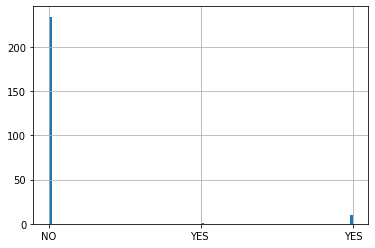

In [3]:
# Clean your data here
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
north_df[['Incoming Wait Time', 'Incoming or Outgoing']]
pd.set_option("display.max_rows", None, "display.max_columns", None)
north_df[['Incoming Wait Time', "Incoming or Outgoing"]]
north_df['Sale'].hist(bins=100)
north_df['Sale'] = north_df['Sale'].str.rstrip()
north_df.duplicated().sum()
south_df.drop_duplicates()


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
Yes
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
I stripped the extra space from Yes. 
3. Are there duplicates in the two data sets? If there are, how did you handle them?
I did not find any duplicates in the North data frame but 3 in the South. I removed them. 
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
No, I did not think any data was unnecessary. I could possibily trim it further but the data set is not very large and I feel each column helps paint a picture of how successful each rep is.  

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [44]:
df = pd.concat([south_df, north_df])
df.groupby(['Rep ID','Branch'])['Calls'].sum()

Rep ID  Branch
Alice   South     20
Amanda  North     23
Andy    North     23
Brent   North     37
Cam     North     24
Duke    North     29
Eric    South     35
George  South     29
Helga   South     31
Joe     North     26
Josh    South     26
Karl    South     28
Kate    South     29
Lilly   North     30
Randy   South     33
Sandy   South     32
Sharon  South     25
Susan   South     26
Todd    North     29
Xander  North     24
Name: Calls, dtype: int64

In [36]:
df.groupby(['Branch', 'Abandoned'])['Calls'].sum()
df['Abandonment Rate'] = df['Abandoned']/df['Calls'].sum()
df['Abandonment Rate'].sum() * 100
north_df['Abandonment Rate North'] = north_df['Abandoned']/north_df['Calls'].sum()
north_df['Abandonment Rate North'].sum() * 100
south_df['Abandonment Rate South'] = south_df['Abandoned']/south_df['Calls'].sum()
south_df['Abandonment Rate South'].sum() * 100

1.2738853503184715

In [97]:
df.groupby(['Branch', 'Incoming Wait Time',])['Calls'].count()

df['Calls within 2 sec'] = df['Incoming Wait Time'] <= 2 
df['Calls within 2 sec'].sum()
df['Service Level'] = df["Calls within 2 sec"]/df['Calls'].sum()
df['Service Level'].sum() * 100
north_df['Calls within 2 sec'] = north_df['Incoming Wait Time'] <= 2 
north_df['Calls within 2 sec'].sum()
north_df['Service Level North'] = north_df["Calls within 2 sec"]/north_df['Calls'].sum()
north_df['Service Level North'].sum() * 100
south_df['Calls within 2 sec'] = south_df['Incoming Wait Time'] <= 2 
south_df['Calls within 2 sec'].sum()
south_df['Service Level South'] = south_df["Calls within 2 sec"]/south_df['Calls'].sum()
south_df['Service Level South'].sum() * 100

15.286624203821656

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
North = Brent
South = Eric
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
North     2.86
South     1.27
Company - 1.97
Each Branch and the entire company do fall into the optimal range. North does have a slightly higher abandonment rate.
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
North Branch - 15.3 %
South Branch - 13.5 %
Company -  14.5
4. For each branch and the entire company, what is the average speed of answer?
North    3.04878
South    3.00000
Company  3.019230769230769

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}
2. What is the service level and average speed of answer per each rep?
    Rep ID  Incoming Wait Time
0    Alice            2.500000
1   Amanda            2.400000
2     Andy            3.600000
3    Brent            2.125000
4      Cam            2.909091
5     Duke            2.785714
6     Eric            2.611111
7   George            3.153846
8    Helga            3.272727
9      Joe            3.600000
10    Josh            3.444444
11    Karl            2.888889
12    Kate            3.363636
13   Lilly            3.083333
14   Randy            2.937500
15   Sandy            2.615385
16  Sharon            3.625000
17   Susan            2.916667
18    Todd            3.500000
19  Xander            3.333333


         Service Level %
Rep ID                                   
Alice      50.000000
Amanda     60.000000
Andy       30.000000
Brent      75.000000
Cam        45.454545
Duke       42.857143
Eric       55.555556
George     30.769231
Helga      27.272727
Joe        20.000000
Josh       22.222222
Karl       33.333333
Kate       27.272727
Lilly      33.333333
Randy      43.750000
Sandy      53.846154
Sharon     12.500000
Susan      41.666667
Todd       33.333333
Xander     33.333333



3. For each type of call purpose, how many calls are outgoing vs. incoming?
Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75

{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

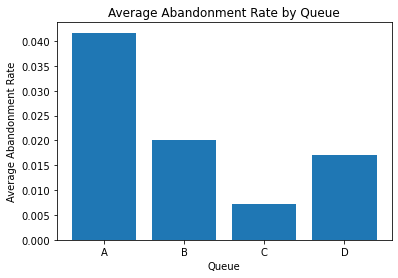

In [81]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]
abandonment_rates
plt.title('Average Abandonment Rate by Queue',color = 'black')
plt.xlabel('Queue',color = 'black')
plt.ylabel('Average Abandonment Rate',color = 'black')
plt.bar(range(len(abandonment_rates)), list(abandonment_rates.values()),  align='center')
plt.xticks(range(len(abandonment_rates)), list(abandonment_rates.keys()))
abandonment_rates

    Rep ID  Incoming Wait Time
0    Alice            2.500000
1   Amanda            2.400000
2     Andy            3.600000
3    Brent            2.125000
4      Cam            2.909091
5     Duke            2.785714
6     Eric            2.611111
7   George            3.153846
8    Helga            3.272727
9      Joe            3.600000
10    Josh            3.444444
11    Karl            2.888889
12    Kate            3.363636
13   Lilly            3.083333
14   Randy            2.937500
15   Sandy            2.615385
16  Sharon            3.625000
17   Susan            2.916667
18    Todd            3.500000
19  Xander            3.333333


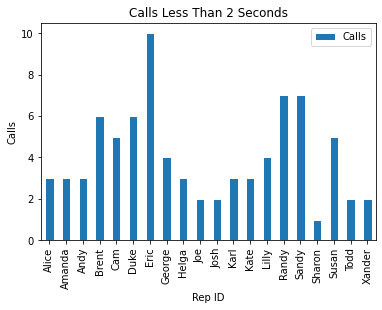

        Calls
Rep ID       
Alice       3
Amanda      3
Andy        3
Brent       6
Cam         5
Duke        6
Eric       10
George      4
Helga       3
Joe         2
Josh        2
Karl        3
Kate        3
Lilly       4
Randy       7
Sandy       7
Sharon      1
Susan       5
Todd        2
Xander      2


In [100]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
print(north_plt)
# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = df[df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table
quick_stats.plot.bar(edgecolor = 'white')
plt.title('Calls Less Than 2 Seconds',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Rep ID',color = 'black')
plt.ylabel('Calls',color = 'black')
plt.savefig('bar_grouped.png')

plt.show()
print(quick_stats)





In [119]:
calls_by = df.groupby(['Rep ID', 'Incoming or Outgoing'])['Calls'].count()
print(calls_by)

Rep ID  Incoming or Outgoing
Alice   Incoming                 6
        Outgoing                14
Amanda  Incoming                 5
        Outgoing                18
Andy    Incoming                10
                                ..
Susan   Outgoing                14
Todd    Incoming                 6
        Outgoing                23
Xander  Incoming                 6
        Outgoing                18
Name: Calls, Length: 40, dtype: int64


Rep ID
Alice      6
Amanda     5
Andy      10
Brent      8
Cam       11
Duke      14
Eric      18
George    13
Helga     11
Joe       10
Josh       9
Karl       9
Kate      11
Lilly     12
Randy     16
Sandy     13
Sharon     8
Susan     12
Todd       6
Xander     6
Name: Calls, dtype: int64


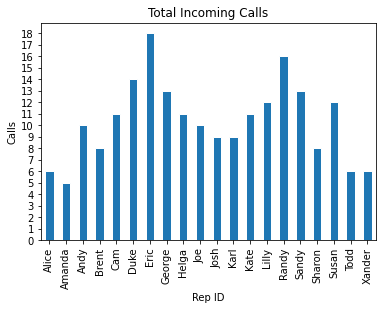

In [127]:
# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = df.loc[df['Incoming or Outgoing'].str.contains("Incoming", case=False)]
rep_calls = total_calls_in[["Rep ID", "Calls"]]   
total_stats = rep_calls.groupby('Rep ID')['Calls'].sum() # Final Table  
print(total_stats)
total_stats.plot.bar(edgecolor = 'white')
plt.title('Total Incoming Calls',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Rep ID',color = 'black')
plt.ylabel('Calls',color = 'black')
plt.yticks(np.arange(0, max(total_stats)+1, 1.0))
plt.savefig('bar_grouped.png')

plt.show()


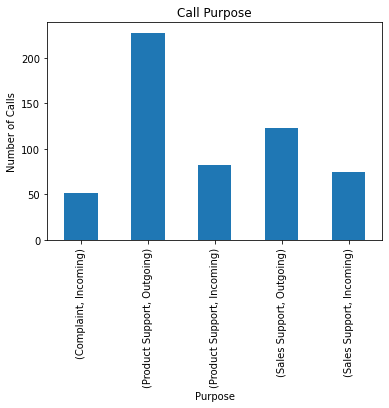

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


In [103]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

#purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
purpose_counts = df.groupby('Call Purpose')['Incoming or Outgoing'].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

purpose_counts.plot(kind = 'bar', legend = False)
plt.title('Call Purpose',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Purpose',color = 'black')
plt.ylabel('Number of Calls',color = 'black')
plt.savefig('bar_vertical.png')

plt.show()
print(purpose_counts)

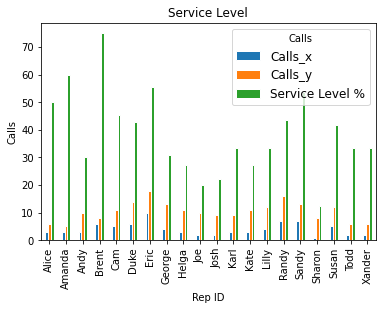

        Calls_x  Calls_y  Service Level %
Rep ID                                   
Alice         3        6        50.000000
Amanda        3        5        60.000000
Andy          3       10        30.000000
Brent         6        8        75.000000
Cam           5       11        45.454545
Duke          6       14        42.857143
Eric         10       18        55.555556
George        4       13        30.769231
Helga         3       11        27.272727
Joe           2       10        20.000000
Josh          2        9        22.222222
Karl          3        9        33.333333
Kate          3       11        27.272727
Lilly         4       12        33.333333
Randy         7       16        43.750000
Sandy         7       13        53.846154
Sharon        1        8        12.500000
Susan         5       12        41.666667
Todd          2        6        33.333333
Xander        2        6        33.333333


In [99]:
#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

service_level
service_level.plot.bar(edgecolor = 'white')
plt.title('Service Level',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Rep ID',color = 'black')
plt.ylabel('Calls',color = 'black')
plt.legend(title = 'Calls', fontsize = 12)
plt.savefig('bar_grouped.png')

plt.show()
print(service_level)

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

For each visualization I used a bar chart. I feel the bar chart is the easiest to read. For the final table in visualization 2 I used a grouped bar chart to show total calls with the percentage of service level as well. 

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
South Branch appears to lose less calls and answer calls more Quickly. They also get more calls. 
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
North Branch could use more help. South branch gets more calls but are able to keep up. They may benefit from 1-2 reps just to handle workload and lower abandonment rate but North Branch could use 3 workers to help boost their numbers. 
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?
Possibily how often each worker calls off, they may perform well but miss a lot of days and in the grand scheme of things they may not be contributing much overall. 

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [10]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
